## Linear Equation

For numerical problems we can use the la.lu function form SciPy’s linear algebra module or np.linalg.
It returns a permutation matrix P and the L and U matrices, such that A = PLU. But, to solve linear algebra, we actually do not need these parameters. So, instead of la.lu, simply use np.linalg to solve the linear equation. For example, we will try to solve (find x1 and x2) from the two equations below:

2x1 + 3x2 = 4
5x1 + 4x2 = 3 

To solve the equations, lets make matrices first using np.array.

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
A = np.array([[2, 3], [5, 4]])
B = np.array([4, 3])
x1, x2 = np.linalg.solve(A,B)
P, L, U = la.lu(A)
print("Rank matrix A: ", np.linalg.matrix_rank(A))
print("Rank matrix B: ", np.linalg.matrix_rank(B))
print("x1 is: ", x1)
print("x2 is: ", x2)
print("Meanwhile, P, L, U metrices are : {};{};{}".format(P, L, U))

Rank matrix A:  2
Rank matrix B:  1
x1 is:  -1.0
x2 is:  2.0
Meanwhile, P, L, U metrices are : [[0. 1.]
 [1. 0.]];[[1.  0. ]
 [0.4 1. ]];[[5.  4. ]
 [0.  1.4]]


## Least Square

In [2]:
# define true model parameters
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b*x + c*x**2
print(x)
print(y_exact)

[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.63636364  0.

In [3]:
# simulate noisy data
m = 100
X = 1 - 2*np.random.rand(m)
Y = a + b*X + c*X**2 + np.random.randn(m)
print(Y)


[ 1.61106091e+00  7.39575873e-01  1.25038734e+00  4.02112908e+00
  1.54867333e+00 -3.01236305e-01  1.06955936e+00  1.68255812e+00
  3.38690323e-01  5.60681681e+00  2.99585463e+00  1.05340735e+00
 -1.92372079e-02  9.67366923e-01  2.37209115e+00  1.17095311e+00
  2.27317407e+00  2.92469055e+00  3.07365477e+00  2.32741912e+00
  2.33877185e+00  3.43191714e+00  2.29969690e+00  8.22161687e-01
  1.03759887e-01  1.37505138e+00  4.37921523e+00  1.25874524e+00
  1.96125996e+00  4.87972166e+00  3.09460646e-01  5.90771115e-01
  3.09267489e+00  1.10420248e+00 -6.72417524e-01  4.72209893e+00
  5.97326444e+00  1.65200775e+00  1.01404865e+00  1.75043519e+00
  5.89738509e-01  7.20374985e-01  2.40445250e+00 -7.90108678e-01
  4.74320357e-01  3.44061978e-01  2.52393322e+00  2.29993713e+00
  1.24514045e+00  3.98464343e+00  7.82258459e-01  2.66924974e+00
  1.52608537e+00  4.50834055e-01  1.66554565e+00  1.87515334e-01
  7.88763244e-02  1.39002398e+00  1.75070321e+00  5.77696658e+00
  1.29148202e+00  1.57957

In [4]:
#fit the data to the model using linear least square
Aa = np.vstack([X**0, X**1, X**2]) # see np.vander for alternative
sol, r, rank, sv = np.linalg.lstsq(Aa.T, Y)
print(sol, r, rank, sv)

[1.08387339 1.9456236  2.76614905] [89.11901537] 3 [10.63078588  5.79136306  2.74639459]


c:\users\stargazers\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


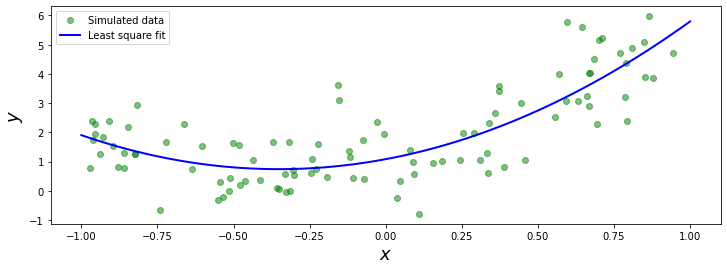

In [5]:
y_fit = sol[0] + sol[1] * x + sol[2] * x**2
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
# ax.plot(x, y_exact, 'r', lw=2, label='True value $y = 1 + 2x +3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

"A good fit of data to a model obviously requires that the model used to describe the
data correspond well to the underlying process that produced the data. In the following
example, and in next Figure, we fit the same data used in the previous example
to linear model and to a higher-order polynomial model (up to order 15). The former
case corresponds to underfitting, where we have used a too simple model for the data,
and the latter case corresponds to overfitting, where we have used a too complex model
for the data, and thus fit the model not only to the underlying trend but also to the
measurement noise. Using an appropriate model is an important and delicate aspect of
data fitting." (p195)

In [6]:
# fit the data to the model using linear least square:
# 1st order polynomial
Ab = np.vstack([X**n for n in range(2)]) # this syntax is key for equation to fit data.
sol, r, rank, sv = la.lstsq(Ab.T, Y) # this syntax is key for equation to fit data.
y_fit1 = sum([s * x**n for n, s in enumerate(sol)]) # why x not X? x is np.linspace(-1,1, 100)
print(y_fit1)

[0.30378994 0.33820171 0.37261349 0.40702526 0.44143704 0.47584881
 0.51026059 0.54467236 0.57908414 0.61349591 0.64790769 0.68231946
 0.71673124 0.75114301 0.78555479 0.81996656 0.85437834 0.88879012
 0.92320189 0.95761367 0.99202544 1.02643722 1.06084899 1.09526077
 1.12967254 1.16408432 1.19849609 1.23290787 1.26731964 1.30173142
 1.33614319 1.37055497 1.40496674 1.43937852 1.47379029 1.50820207
 1.54261384 1.57702562 1.61143739 1.64584917 1.68026094 1.71467272
 1.74908449 1.78349627 1.81790805 1.85231982 1.8867316  1.92114337
 1.95555515 1.98996692 2.0243787  2.05879047 2.09320225 2.12761402
 2.1620258  2.19643757 2.23084935 2.26526112 2.2996729  2.33408467
 2.36849645 2.40290822 2.43732    2.47173177 2.50614355 2.54055532
 2.5749671  2.60937887 2.64379065 2.67820242 2.7126142  2.74702598
 2.78143775 2.81584953 2.8502613  2.88467308 2.91908485 2.95349663
 2.9879084  3.02232018 3.05673195 3.09114373 3.1255555  3.15996728
 3.19437905 3.22879083 3.2632026  3.29761438 3.33202615 3.3664

In [7]:
#15th order polynomial
Ac = np.vstack([X**n for n in range(16)])
sol, r, rank, sv = la.lstsq(Ac.T, Y)
y_fit15 = sum([s * x**n for n, s in enumerate(sol)])
print(y_fit15)

[-4.12600359  0.47267088  1.91453351  2.03254715  1.76057515  1.50504007
  1.38710743  1.3933527   1.46354717  1.53677762  1.57127772  1.54882116
  1.47107024  1.352686    1.2141145   1.07562258  0.95324252  0.85669838
  0.78904248  0.74756226  0.72547089  0.7139271   0.70400827  0.68836169
  0.6623635   0.62471273  0.57746971  0.52561184  0.47622192  0.43744766
  0.41737634  0.42295901  0.45909842  0.52798659  0.62874551  0.75739142
  0.90711154  1.06881468  1.23189546  1.38513647  1.51766519  1.61988121
  1.68427551  1.70607485  1.68366064  1.61873094  1.51619523  1.38381284
  1.23160568  1.07109323  0.91441119  0.77338386  0.65862415  0.57873307
  0.53966345  0.5443005   0.59229549  0.68016938  0.80168207  0.94844091
  1.11070169  1.2782972   1.44161472  1.59253525  1.72524555  1.83683966
  1.92763921  2.00118257  2.06385973  2.12420189  2.19187038  2.27642565
  2.38599074  2.52595152  2.69785432  2.89866597  3.12054899  3.3512719
  3.57532019  3.775696    3.93629678  4.04464942  4.

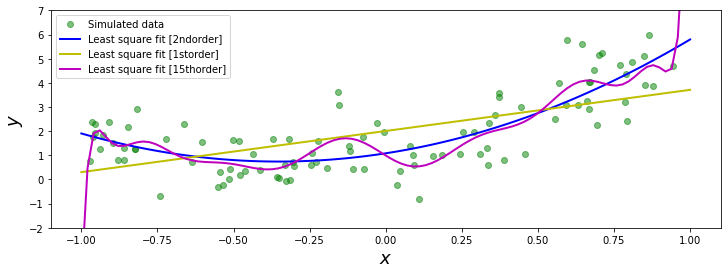

In [10]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
# ax.plot(x, y_exact, 'r', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit [2ndorder]')
ax.plot(x, y_fit1, 'y', lw=2, label='Least square fit [1storder]')
ax.plot(x, y_fit15, 'm', lw=2, label='Least square fit [15thorder]')
ax.set_ylim([-2,7])
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

source: Johansson, R. 2019. Numerical Python.